In [1]:
##########################################################
#  Python script template for Question 1 (IAML Level 10)
#  Note that
#  - You should not change the name of this file, 'iaml01cw2_q1.py', which is the file name you should use when you submit your code for this question.
#  - You should write code for the functions defined below. Do not change their names.
#  - You can define function arguments (parameters) and returns (attributes) if necessary.
#  - In case you define additional functions, do not define them here, but put them in a separate Python module file, "iaml01cw2_my_helpers.py", and import it in this script.
#  - For those questions requiring you to show results in tables, your code does not need to present them in tables - just showing them with print() is fine.
#  - You do not need to include this header in your submission.
##########################################################

#--- Code for loading modules and the data set and pre-processing --->
# NB: You can edit the following and add code (e.g. code for loading sklearn) if necessary.

import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from itertools import accumulate
from iaml01cw2_helpers import *

plt.rcParams['figure.figsize'] = [14, 8]

%run iaml01cw2_my_helpers.ipynb

/home/stas/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


In [2]:
# Q1.1
def iaml01cw2_q1_1():
    def print_vec(v):
        print(', '.join((format(v[i]*1000*1000, '.3f') for i in range(4))) + ' \\times 10^{-6}')
        
    print_vec(Xtrn_nm[0,:4])
    print_vec(Xtrn_nm[-1,:4])
    
iaml01cw2_q1_1()   # comment this out when you run the function

-3.137, -22.680, -117.974, -407.059 \times 10^{-6}
-3.137, -22.680, -117.974, -407.059 \times 10^{-6}


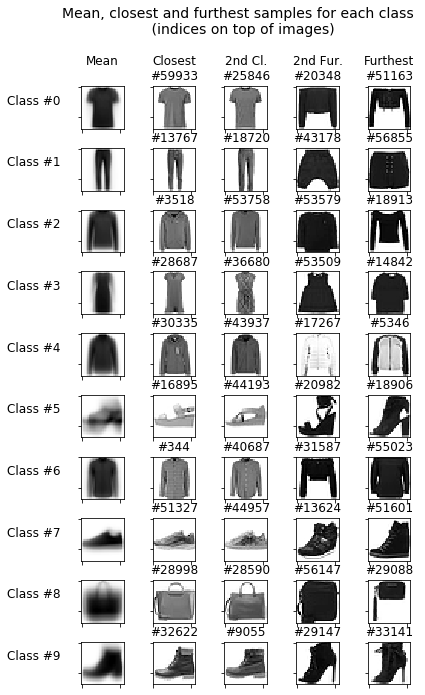

In [64]:
# Q1.2
def iaml01cw2_q1_2():
    fig, ax = plt.subplots(figsize=(6,11), nrows=10, ncols=5) #sharex=True, sharey=True)
    fig.subplots_adjust(wspace=0.5, hspace=0.45)
    fig.suptitle("Mean, closest and furthest samples for each class \n (indices on top of images)", fontsize=14)
    Xtrn_with_idx = np.concatenate((np.arange(len(Xtrn)).reshape(-1,1), Xtrn), axis=1)
    
    for cl in range(10):
        Xtrn_with_idx_cls = Xtrn_with_idx[Ytrn==cl]
        clXs = Xtrn[Ytrn==cl]
        clMeanX = clXs.mean(axis=0)
        dists = np.apply_along_axis(lambda row: ((row-clMeanX)**2).sum(), 1, clXs)
        dists_sorted = sorted(enumerate(dists), key = lambda t: t[1])
        indices_to_show = [dists_sorted[0][0], dists_sorted[1][0], dists_sorted[-2][0], dists_sorted[-1][0]]
        imgs_to_show = [clMeanX] + [clXs[idx] for idx in indices_to_show]
        imgs_to_show_rs =  [img.reshape((28,28)) for img in imgs_to_show]
        
        
        for col in range(5):
            #ax[cl][col].axis('off')
            ax[cl][col].set_yticklabels([])
            ax[cl][col].set_xticklabels([])
            ax[cl][col].imshow(imgs_to_show_rs[col], cmap='gray_r')
            if col > 0:
                pref = '' if cl != 0 else (['Closest', '2nd Cl.', '2nd Fur.', 'Furthest'][col-1] +'\n')
                idx = indices_to_show[col-1]
                global_idx = int(Xtrn_with_idx_cls[idx,0]+0.5)
                ax[cl, col].set_title(pref + f'#{global_idx}')
    
        ax[0,0].set_title('Mean\n ')
            
        
        ax[cl,0].set_ylabel(f'Class #{cl}', rotation=0, size='large', labelpad=40)
            #if cl==0:
            #    ax[cl,col].set_title(['Mean', 'Closest', '2nd Cl.', '2nd Fur.', 'Furthest'][col])
        
    plt.savefig('imgs/1_2.png', bbox_inches = 'tight', pad_inches = 0.2)
    plt.show()
        
iaml01cw2_q1_2()   # comment this out when you run the function

# TODO: Figure out how to add labels 

In [209]:
# Q1.3
def iaml01cw2_q1_3():
    pca = PCA(n_components=5)
    pca.fit(Xtrn_nm)
    print('& '.join((format(x,'.2f') for x in pca.explained_variance_)))
iaml01cw2_q1_3()   # comment this out when you run the function

19.81& 12.11& 4.11& 3.38& 2.62


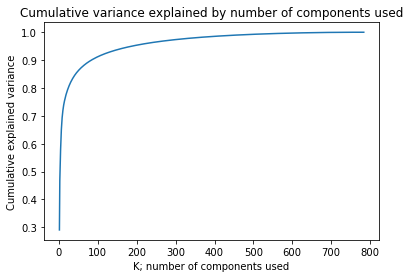

In [24]:
# Q1.4
def iaml01cw2_q1_4():
    pca = PCA()
    pca.fit(Xtrn_nm)
    accd = accumulate(pca.explained_variance_ratio_)
    plt.title('Cumulative variance explained by number of components used')
    plt.xlabel('K; number of components used')
    plt.axes().set_ylabel('Cumulative explained variance')
    plt.plot(list(range(1,785)), list(accd))
    plt.savefig("imgs/1_4.png", )
iaml01cw2_q1_4()   # comment this out when you run the function

0.00011087352919790661 0.061052205086716736


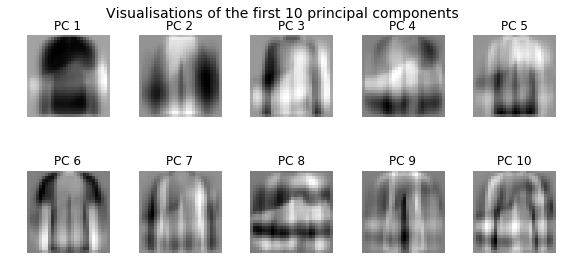

In [74]:
# Q1.5
def iaml01cw2_q1_5():
    pca = PCA()
    pca.fit(Xtrn_nm)
    print(pca.components_[0][28*5+0], pca.components_[0][28*5+15])
    fig, ax = plt.subplots(figsize=(10, 4), nrows=2, ncols=5, sharex=True, sharey=True)
    fig.suptitle("Visualisations of the first 10 principal components", fontsize=14)
    fig.subplots_adjust(wspace=0, hspace=0.65)
    
    for i in range(10):
        row = i//5
        col = i%5
        ax[row][col].imshow((pca.components_[i]).reshape((28,28)), cmap='gray_r')
        ax[row][col].axis('off')
        ax[row][col].set_title(f'PC {i+1}')
    plt.savefig("imgs/1_5.png", bbox_inches = 'tight', pad_inches = 0.4)
iaml01cw2_q1_5()   # comment this out when you run the function

In [220]:
# Q1.6
def iaml01cw2_q1_6():
    res = np.zeros((10,4))

    for i,k in enumerate([5,20,50,200]):
        pca = PCA(n_components=k)
        pca.fit(Xtrn_nm)
        for cl in range(10):
            first_sample = Xtrn_nm[Ytrn==cl][[0]]
            first_new = pca.transform(first_sample)
            first_rec = pca.inverse_transform(first_new)
        
            res[cl, i] = np.sqrt(((first_sample-first_rec)**2).mean())
            
    for cl in range(10):
        print('#' + str(cl) + ' & ' + ' & '.join(format(res[cl,i],'.2f') for i in range(4)) + '\\\\')
    return res
            
iaml01cw2_q1_6()   # comment this out when you run the function

#0 & 0.26 & 0.15 & 0.13 & 0.06\\
#1 & 0.20 & 0.14 & 0.10 & 0.04\\
#2 & 0.20 & 0.15 & 0.12 & 0.08\\
#3 & 0.15 & 0.11 & 0.08 & 0.06\\
#4 & 0.12 & 0.10 & 0.09 & 0.05\\
#5 & 0.18 & 0.16 & 0.14 & 0.09\\
#6 & 0.13 & 0.10 & 0.07 & 0.05\\
#7 & 0.17 & 0.13 & 0.11 & 0.06\\
#8 & 0.22 & 0.15 & 0.12 & 0.09\\
#9 & 0.18 & 0.15 & 0.12 & 0.07\\


array([[0.25614867, 0.15007614, 0.1278643 , 0.06271693],
       [0.1980244 , 0.14046348, 0.09515218, 0.0362641 ],
       [0.19870015, 0.14561814, 0.12250012, 0.08058435],
       [0.14565798, 0.10720538, 0.08393703, 0.05560217],
       [0.11820871, 0.10264091, 0.08762782, 0.04659684],
       [0.18112976, 0.15891143, 0.14245888, 0.09057953],
       [0.12947928, 0.0955773 , 0.07235288, 0.04647878],
       [0.16562539, 0.12797007, 0.10658683, 0.06344454],
       [0.22339659, 0.14501276, 0.1242258 , 0.09111225],
       [0.18351042, 0.15110234, 0.12260629, 0.07134104]])

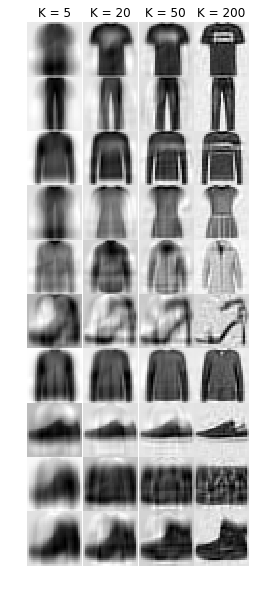

In [75]:
# Q1.7
def iaml01cw2_q1_7():
    fig, ax = plt.subplots(figsize=(4, 10), nrows=10, ncols=4, sharex=True, sharey=True)
    fig.subplots_adjust(wspace=0, hspace=0)
    Ks = [5,20,50,200]
    for i,k in enumerate(Ks):
        pca = PCA(n_components=k)
        pca.fit(Xtrn_nm)
        for cl in range(10):
            first_sample = Xtrn_nm[Ytrn==cl][[0]]
            first_new = pca.transform(first_sample)
            first_rec = pca.inverse_transform(first_new)
            ax[cl][i].imshow((first_rec+Xmean).reshape((28,28)), cmap='gray_r')
            ax[cl][i].axis('off')
        for i in range(4):
            ax[0,i].set_title(f'K = {Ks[i]}')
    plt.savefig("imgs/1_7.png", bbox_inches = 'tight', pad_inches = 0)
iaml01cw2_q1_7()   # comment this out when you run the function

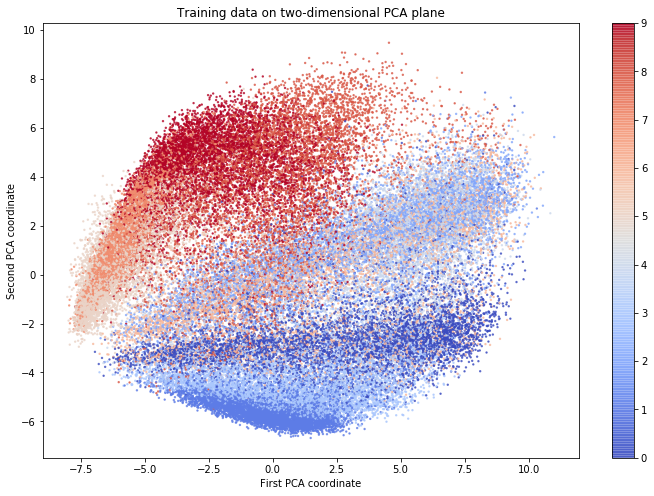

In [73]:
# Q1.8
def iaml01cw2_q1_8():
    pca = PCA(n_components=5)
    Xtrn_new = pca.fit_transform(Xtrn_nm)
    
    plt.figure(figsize=(12,8))
    plt.title('Training data on two-dimensional PCA plane')
    plt.xlabel('First PCA coordinate')
    plt.ylabel('Second PCA coordinate')

    plt.scatter(Xtrn_new[:,0],Xtrn_new[:,1], s=2, c=Ytrn, cmap="coolwarm", alpha=0.7)
    plt.colorbar(spacing='uniform')
    plt.savefig("imgs/1_8.png", bbox_inches = 'tight', pad_inches = 0.25)
iaml01cw2_q1_8()   # comment this out when you run the function